# Importing Libraries ....

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

# for reading stock data from yahoo

from pandas_datareader.data import DataReader

import yfinance as yf

from pandas_datareader import data as pdr

from datetime import datetime

yf.pdr_override()



In [2]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [3]:
end = datetime.now()
start = datetime(end.year -1, end.month, end.day)

In [4]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
company_list = [AAPL, GOOG, MSFT, AMZN]

company_name = ["APPLE","GOOGLE","MICROSOFT","AMAZON"]

In [6]:
for company , com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis= 0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-05-17,183.759995,185.300003,183.350006,184.699997,184.699997,33175700,AMAZON
2024-05-20,184.339996,186.669998,183.279999,183.539993,183.539993,30511800,AMAZON
2024-05-21,182.300003,183.259995,180.750000,183.149994,183.149994,50839100,AMAZON
2024-05-22,183.880005,185.220001,181.970001,183.130005,183.130005,28148800,AMAZON
2024-05-23,183.660004,184.759995,180.080002,181.050003,181.050003,33670200,AMAZON
2024-05-24,181.649994,182.440002,180.300003,180.750000,180.750000,27434100,AMAZON
2024-05-28,179.929993,182.240005,179.490005,182.149994,182.149994,29927000,AMAZON
2024-05-29,181.699997,184.080002,181.550003,182.020004,182.020004,32009300,AMAZON
2024-05-30,181.309998,181.339996,178.360001,179.320007,179.320007,29249200,AMAZON


 use describe()..

In [7]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,182.397360,183.874520,181.002160,182.462840,181.916104,5.808507e+07
std,8.546552,8.362789,8.552836,8.501094,8.433899,1.869315e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,175.212494,176.997501,173.620003,175.190006,174.799721,4.678172e+07
50%,182.595001,184.440002,181.400002,182.815002,182.307198,5.307365e+07
75%,189.839996,191.037502,188.879997,189.827496,189.465916,6.487615e+07
max,198.020004,199.619995,197.000000,198.110001,197.589523,1.632241e+08


info()->> use to print information of th dataframe including the index dtype and columns, non null values etc..

In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-06-05 to 2024-05-31
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


# Closing Price...

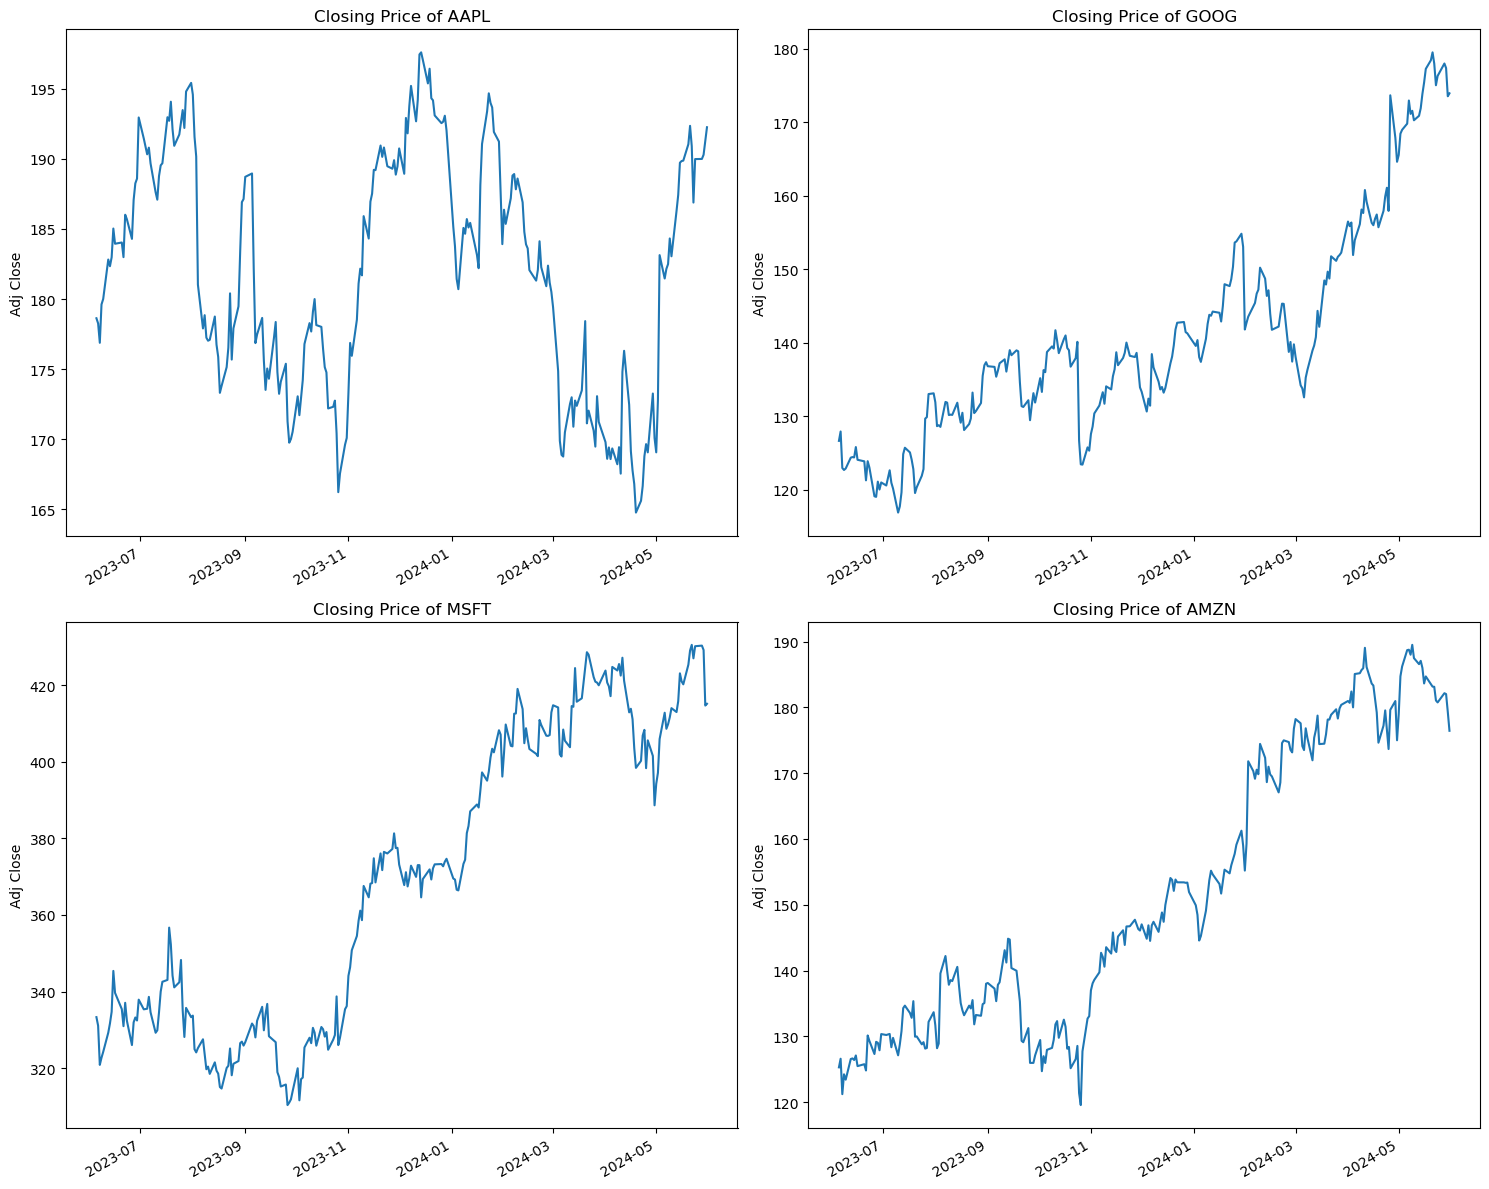

In [9]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(top=1.33, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.xlabel(None)
    plt.ylabel('Adj Close')
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

# Volumes of Sales

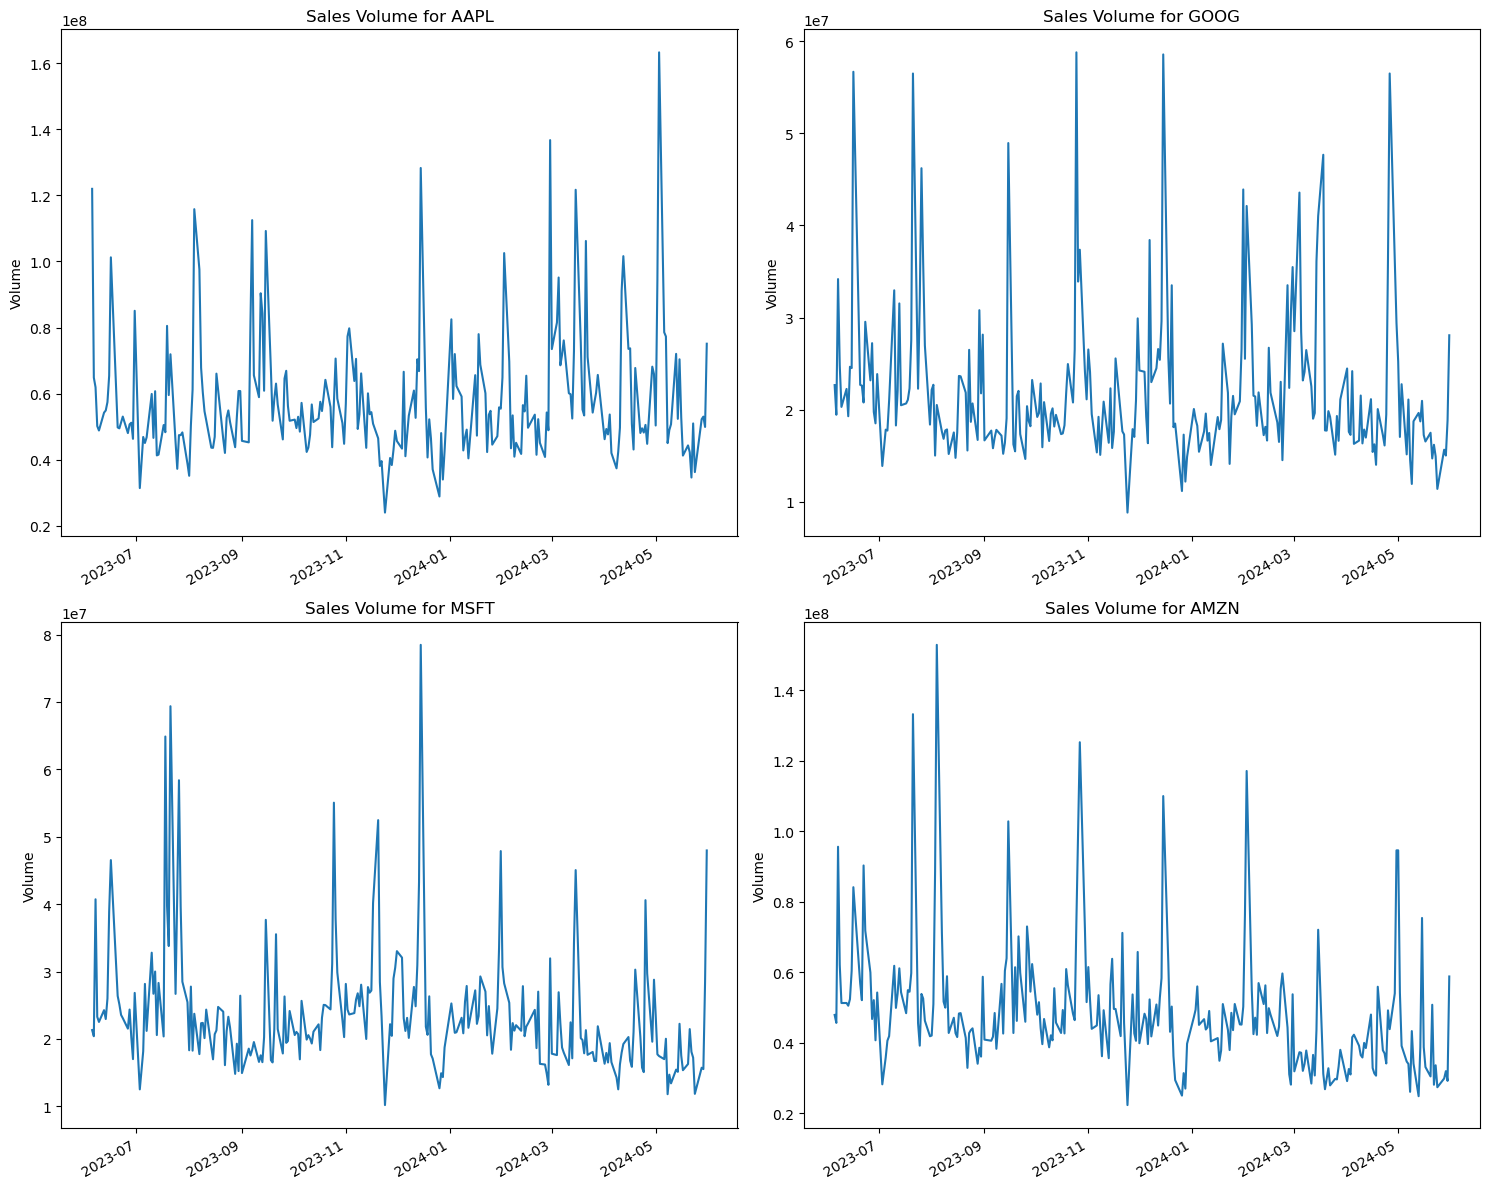

In [10]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(top=1.33, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.xlabel(None)
    plt.ylabel('Volume')
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

# What was the Moving Average of the various stocks?

Moving average(MA)is technical tool that smooths out price data by creatin a constantly updated average
price . the average period of time like 20 days, 40 minutes or 50 weeks or any other trader chooses..

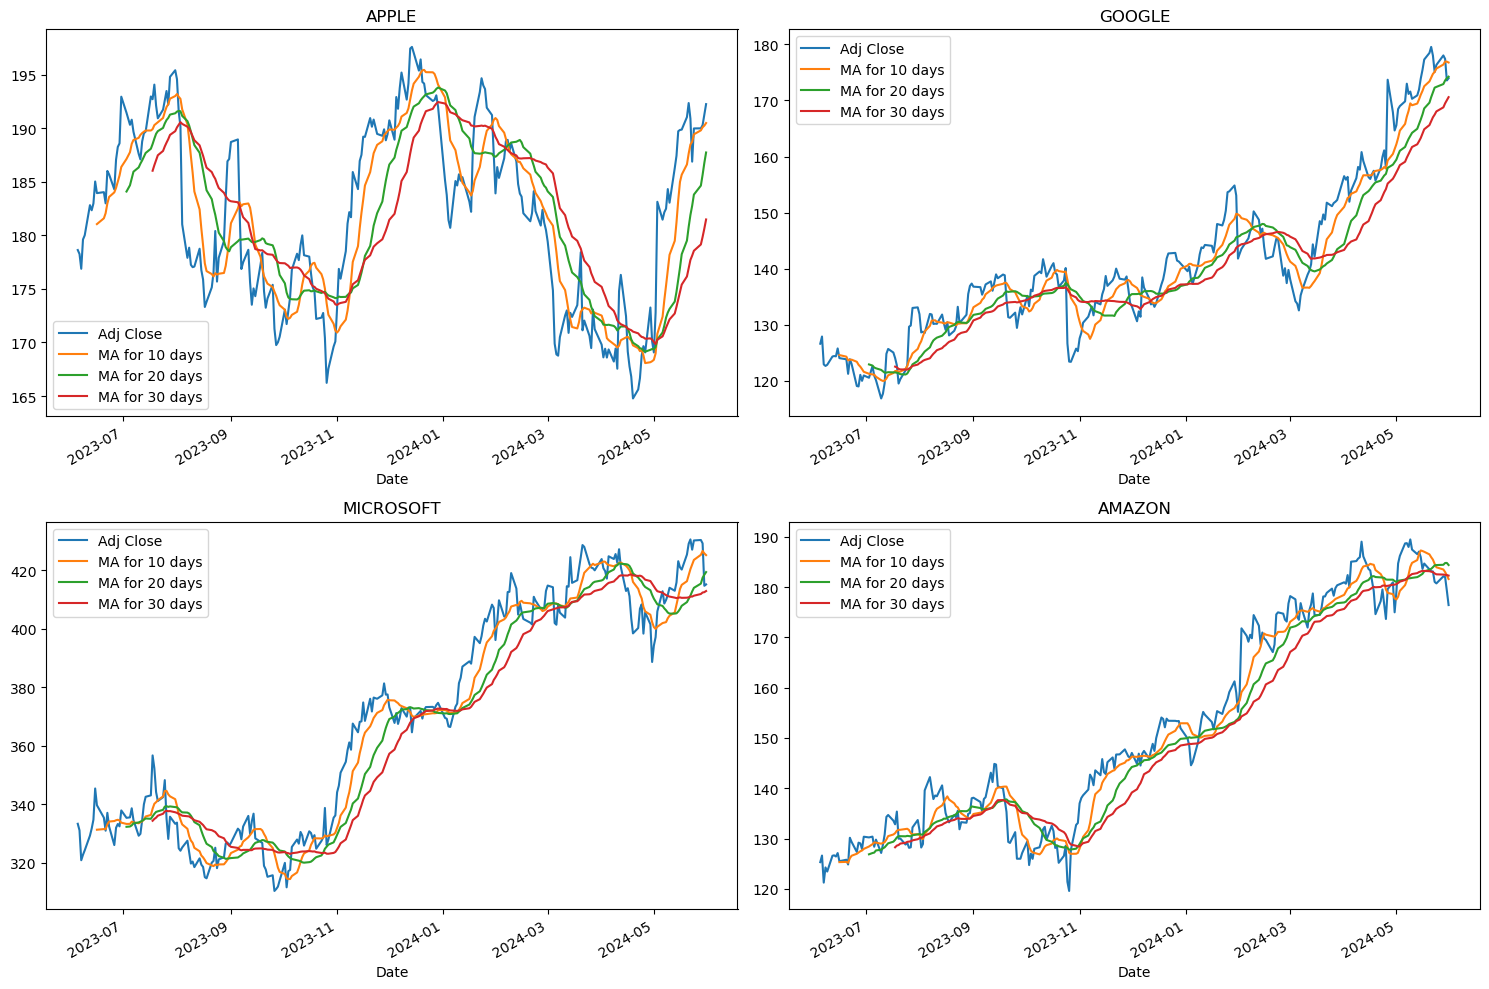

In [11]:
ma_day = [10, 20, 30]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
fig,  axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 30 days']].plot(ax = axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 30 days']].plot(ax = axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 30 days']].plot(ax = axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 30 days']].plot(ax = axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# what was the daily return of stock on average?

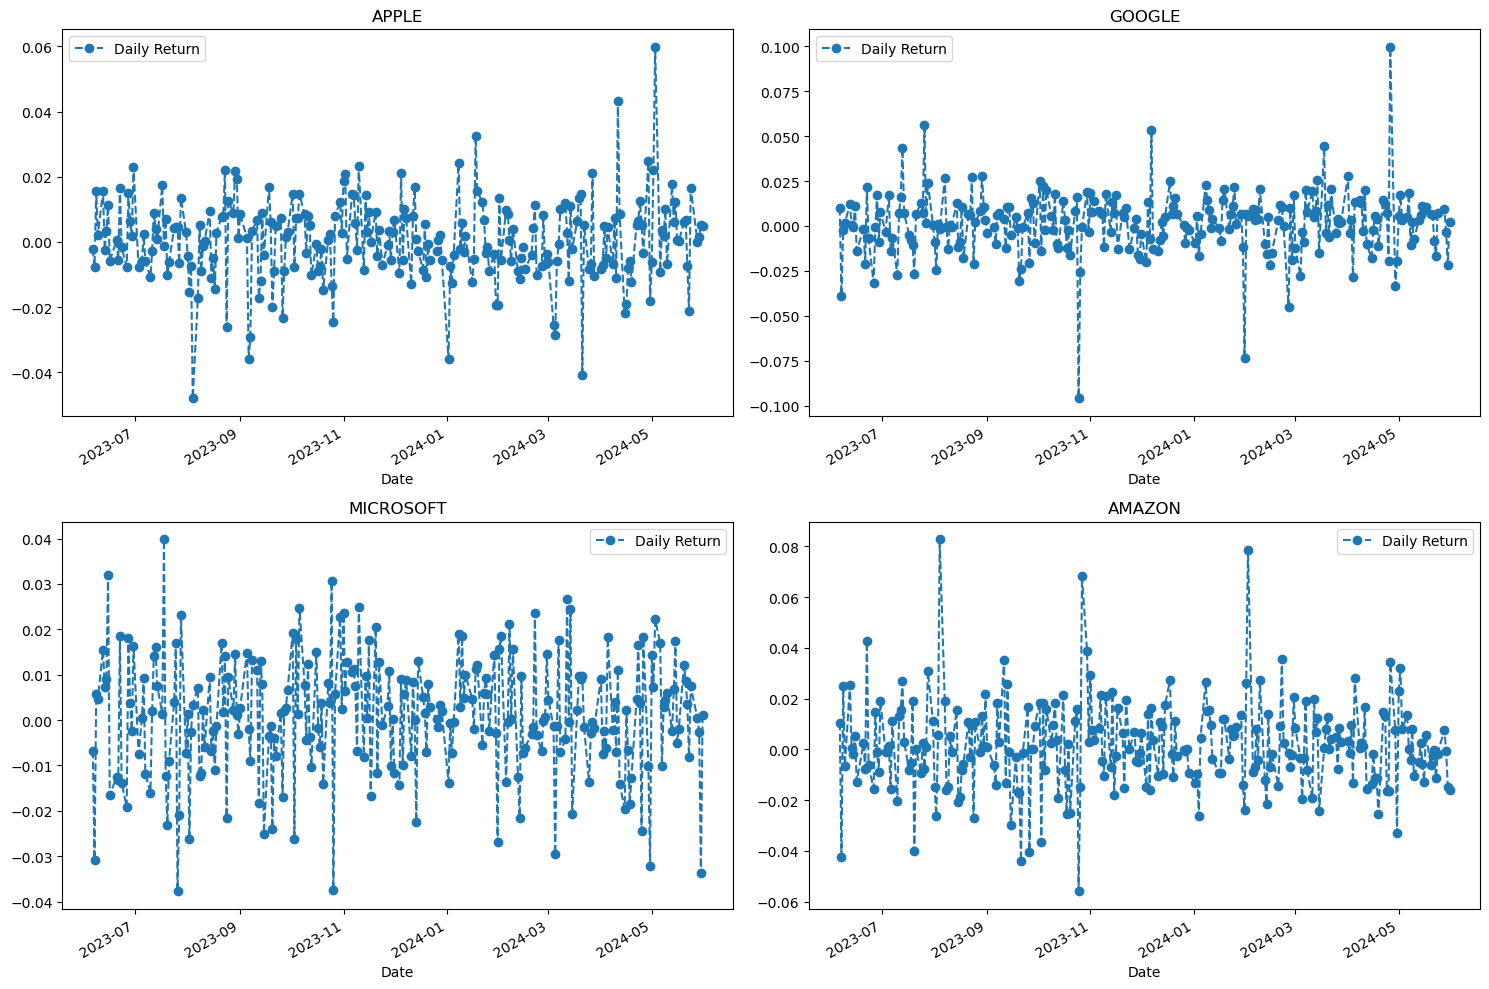

In [12]:
# we will use pct_change to find the present change for each day.

for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()  # pct--> percentage
    
fig,  axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax = axes[0,0], legend=True, linestyle = '--', marker = 'o')
axes[0,0].set_title('APPLE')
    
GOOG['Daily Return'].plot(ax = axes[0,1], legend=True, linestyle = '--', marker = 'o')
axes[0,1].set_title('GOOGLE') 

MSFT['Daily Return'].plot(ax = axes[1,0], legend=True, linestyle = '--', marker = 'o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax = axes[1,1], legend=True, linestyle = '--', marker = 'o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Now lets get overall look at the average daily return using a histogram.

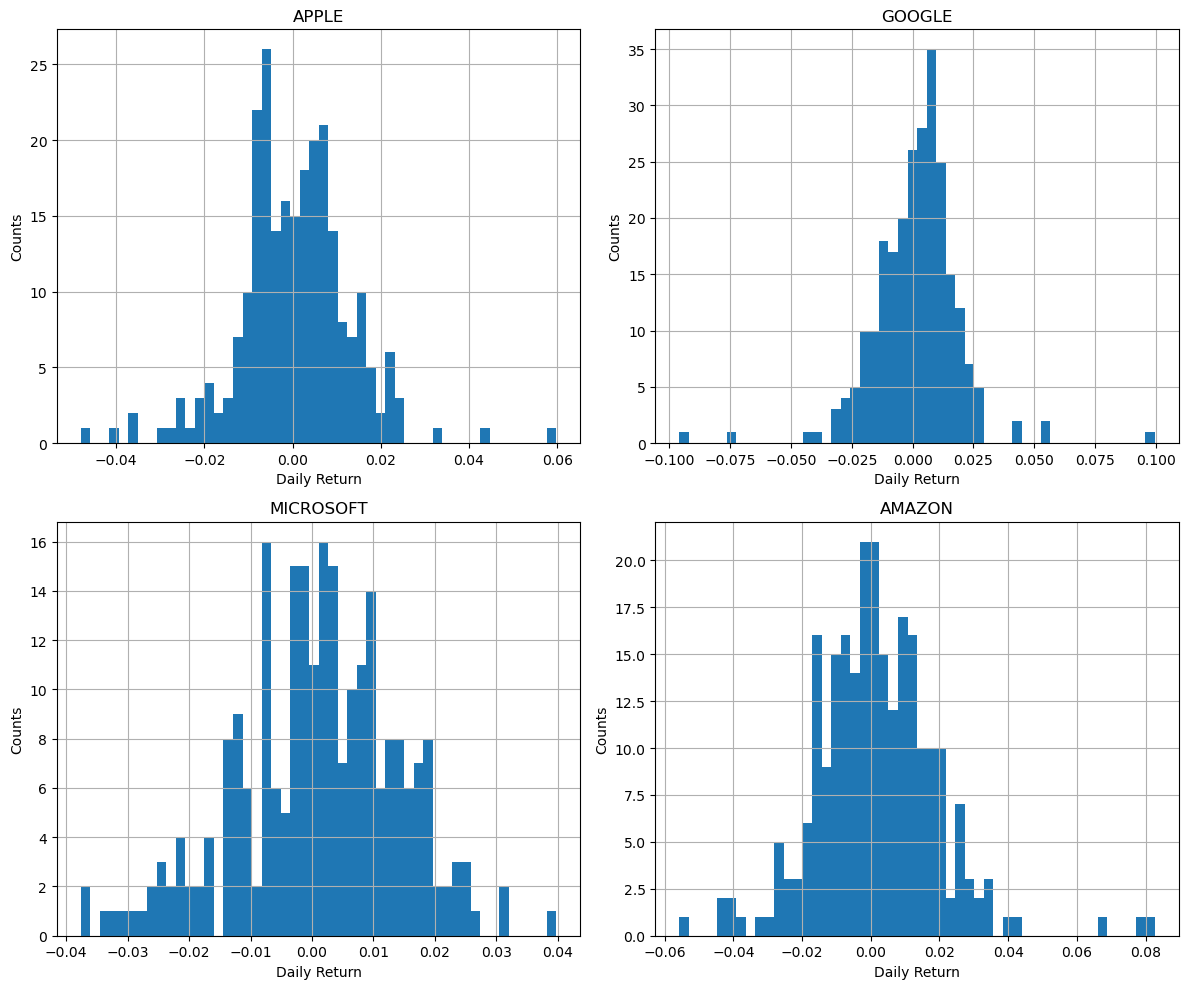

In [13]:
plt.figure(figsize = (12,10))

for i, company in enumerate(company_list,1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f"{company_name[i - 1]}")
    
plt.tight_layout()

# What was the Correlation between different stocks closing prices?

Correlation is a statistic that measure the degree to which two variables move in relation to each
other which has a value that must fall between -1.0 and +1.0. Correlation measure association, but does
not show if x causes y or vice versa - or if the association is caused by a third factor[1].

In [14]:
# grab all the closing prices for the tech stock list into one DataFrame.

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

tech_show = closing_df.pct_change()

tech_show.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-06-05,NaN,NaN,NaN,NaN
2023-06-06,-0.002060,0.010455,0.010108,-0.006727
2023-06-07,-0.007756,-0.042493,-0.038855,-0.030868
2023-06-08,0.015465,0.024911,-0.002196,0.005814
2023-06-09,0.002160,-0.006600,0.001630,0.004704


Now we can compare the percentage of two stock to check how correlated..

In [15]:
import seaborn as sns

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


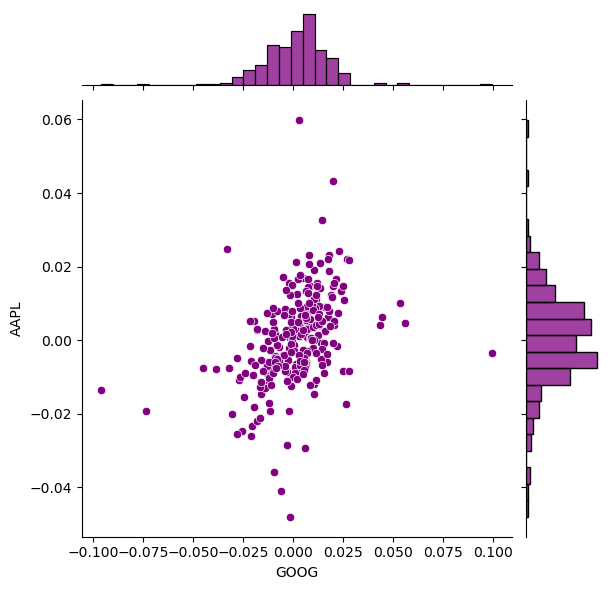

In [16]:
#comparing google to itself should have a perfect linear realtionship.

sns.jointplot(x='GOOG', y='AAPL', data=tech_show, kind='scatter', color='Purple')

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


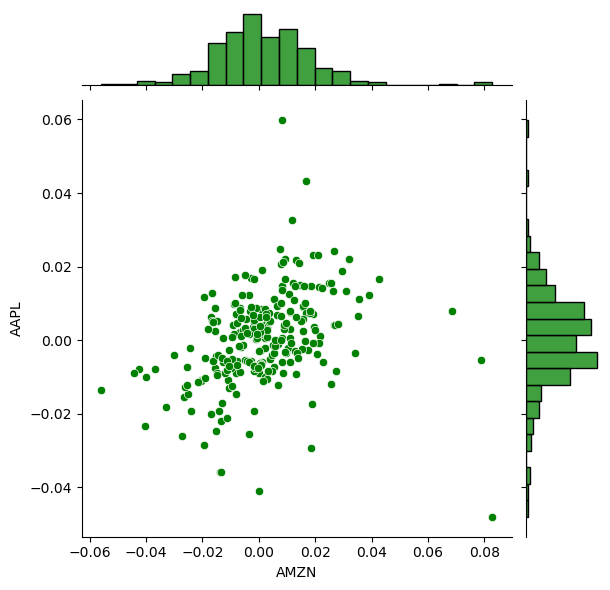

In [17]:
# we will jointplot to compare the daily return of Microsoft and Amazon.

sns.jointplot(x='AMZN', y='AAPL', data=tech_show, kind='scatter', color="green")


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


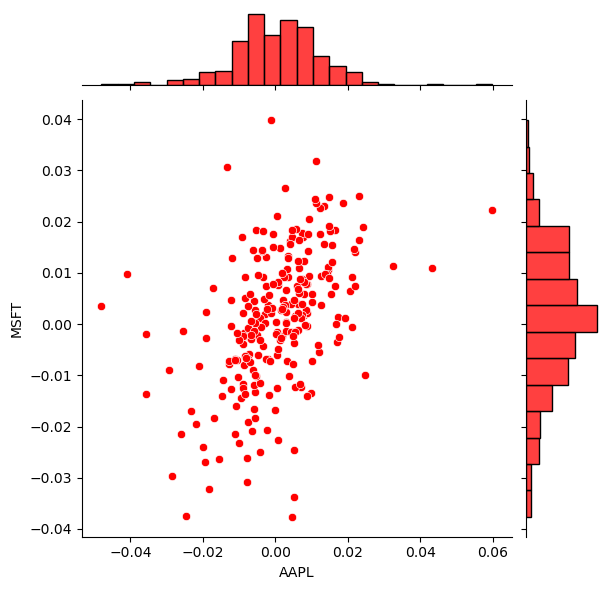

In [18]:
# we will jointplot to compare the daily return of Google and Microsoft

sns.jointplot(x='AAPL', y='MSFT', data=tech_show, kind='scatter', color="Red")

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


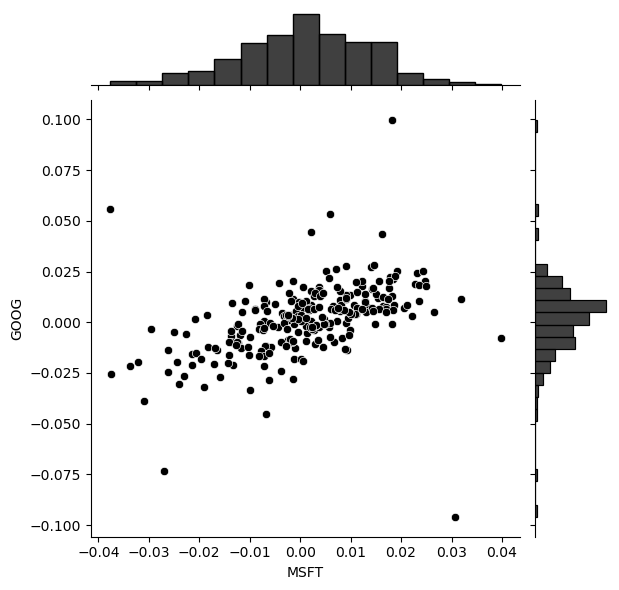

In [19]:
# we will jointplot to compare the daily return of Microsoft and GOOG..

sns.jointplot(x='MSFT', y='GOOG', data=tech_show, kind='scatter', color="black")

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

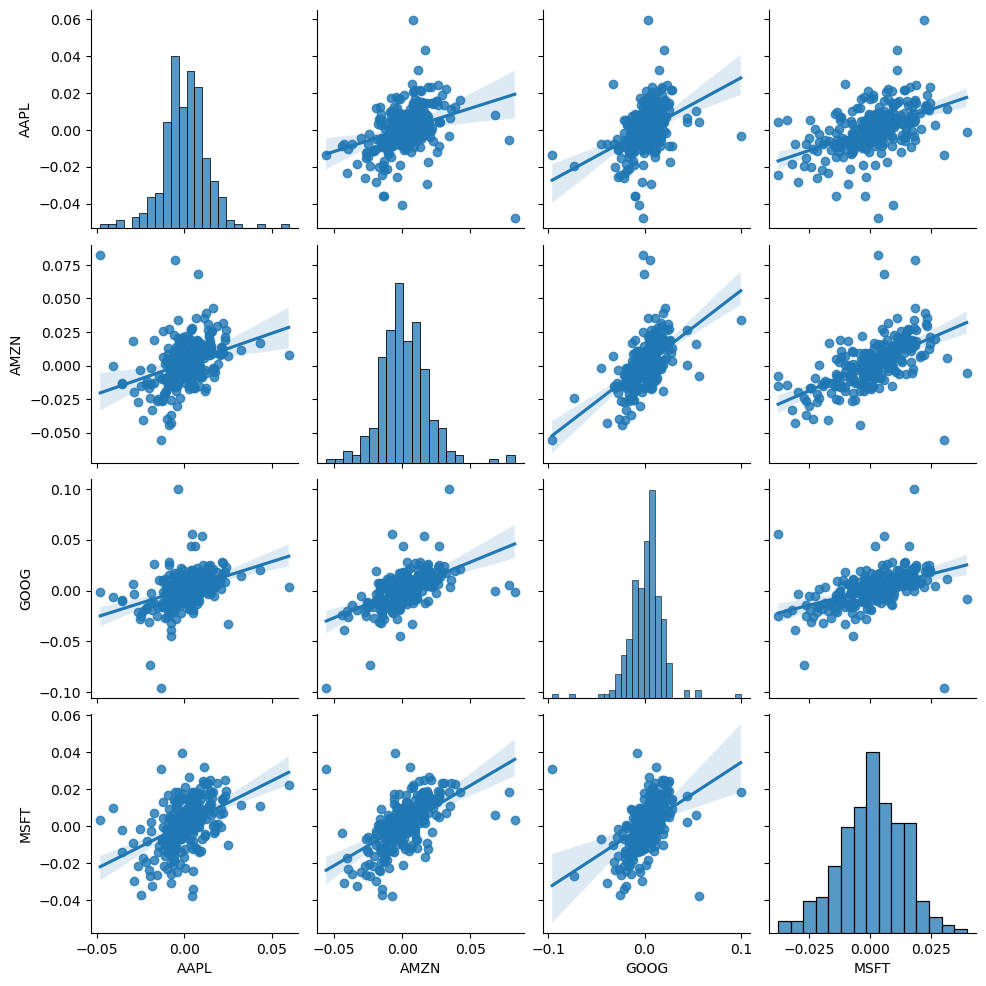

In [20]:
# we can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparison.

sns.pairplot(tech_show, kind='reg')

Above graph we can see all the relationships on daily return between all the stocks.
while the simplicity of just calling sns.pairplot().

Now here we numerically and visually that APPLE and GOOGLE had the strongest correlation of daily 
stock return. It is also interesting to see that all the technology companies are postively correlated.

Text(0.5, 1.0, 'Correlation of stock closing price')

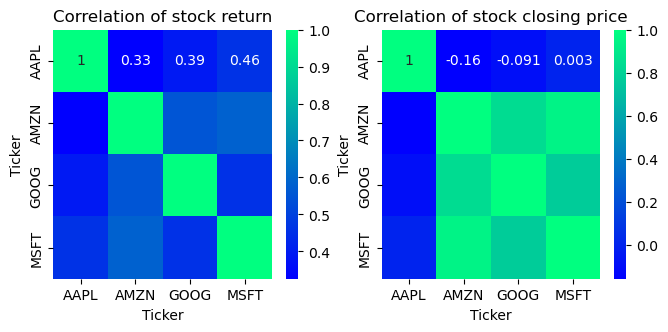

In [21]:
plt.figure(figsize=(12,11))

plt.subplot(3,3,1)
sns.heatmap(tech_show.corr(), annot=True, cmap='winter')
plt.title('Correlation of stock return')


plt.subplot(3,3,2)
sns.heatmap(closing_df.corr(), annot=True, cmap='winter')
plt.title('Correlation of stock closing price')

# How much value do we put at risk by investing in a particular stock ?

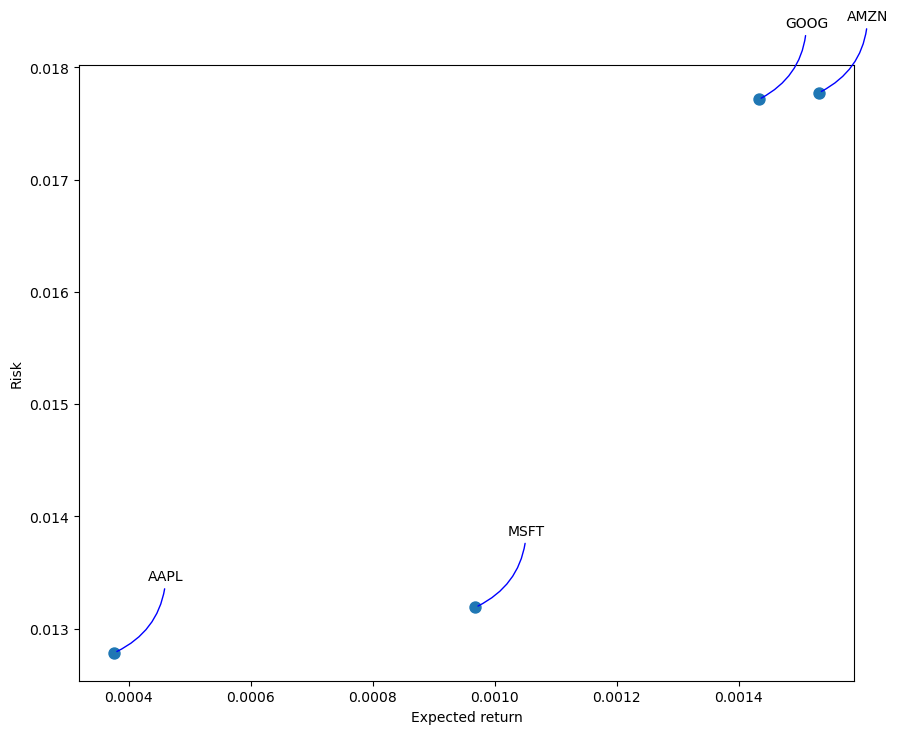

In [22]:
show = tech_show.dropna()

area =  np.pi * 20

plt.figure(figsize = (10, 8))
plt.scatter(show.mean(), show.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(show.columns, show.mean(), show.std()):
    plt.annotate(label, xy = (x,y), xytext = (50, 50), textcoords ='offset points', ha ='right', 
     va ='bottom', arrowprops = dict(arrowstyle ='-', color ='blue', connectionstyle ='arc3, rad=-0.3'))
    

# Predicṭing the closing price stock price of MICROSOFT inc:

In [24]:
df = pdr.get_data_yahoo('MSFT', start = '2012-01-01', end = datetime.now())

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.200512,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.699442,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.921186,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.261730,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,21.968706,59706800
...,...,...,...,...,...,...
2024-05-24,427.190002,431.059998,424.410004,430.160004,430.160004,11845800
2024-05-28,429.630005,430.820007,426.600006,430.320007,430.320007,15718000
2024-05-29,425.690002,430.940002,425.690002,429.170013,429.170013,15517100


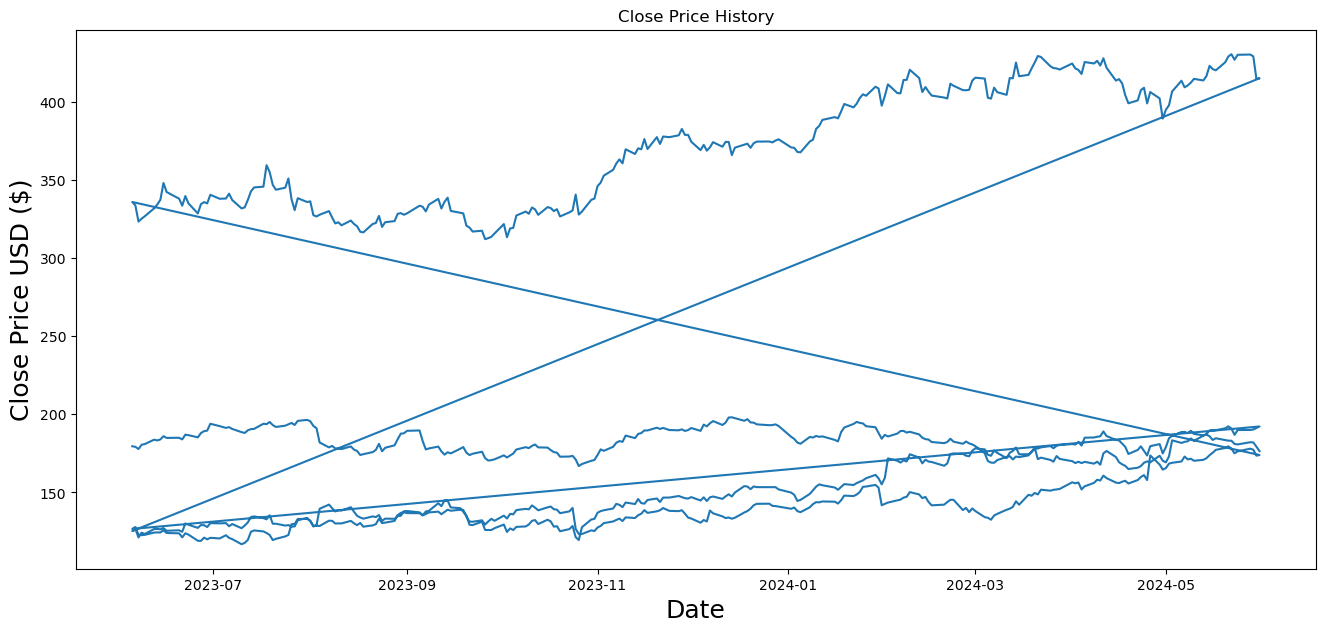

In [23]:
plt.figure(figsize = (16,7))
plt.plot(df['Close'])
plt.title('Close Price History')          
plt.xlabel('Date', fontsize = 18)         
plt.ylabel('Close Price USD ($)', fontsize = 18)
          
plt.show()

In [25]:
#Create a new DataFrame with only the Close Column
data = df.filter(['Close'])

#covert the DataFrame to a Numpy array
dataset = data.values

#get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))

training_data_len

2967

In [26]:
# importing the library for scale the data.

from sklearn.preprocessing import MinMaxScaler

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[9.89730620e-04],
       [2.54855576e-03],
       [3.24136955e-03],
       ...,
       [9.96659716e-01],
       [9.60781947e-01],
       [9.61920117e-01]])

In [28]:
# create the training data set.
# crteate the scaled training data set.

train_data = scaled_data[0 : int(training_data_len), :]

# split the data into x_train and y_train data sets.

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 6 : i, 0])
    y_train.append(train_data[i , 0])
    
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# convert the x_train and y_train to numpy arrays.
x_train , y_train = np.array(x_train), np.array(y_train)

# Reshape the data of X_train.
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.01370778, 0.01393047, 0.01395521, 0.01539032, 0.01521712,
       0.01440059])]
[0.014227386517130278]

[array([0.01370778, 0.01393047, 0.01395521, 0.01539032, 0.01521712,
       0.01440059]), array([0.01393047, 0.01395521, 0.01539032, 0.01521712, 0.01440059,
       0.01422739])]
[0.014227386517130278, 0.01457379105441807]



In [29]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
#define the feature columns and target column

ftrs = ['Open', 'High', 'Low']
target = 'Close'

In [32]:
#train/test split

x= df[ftrs]
y= df[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

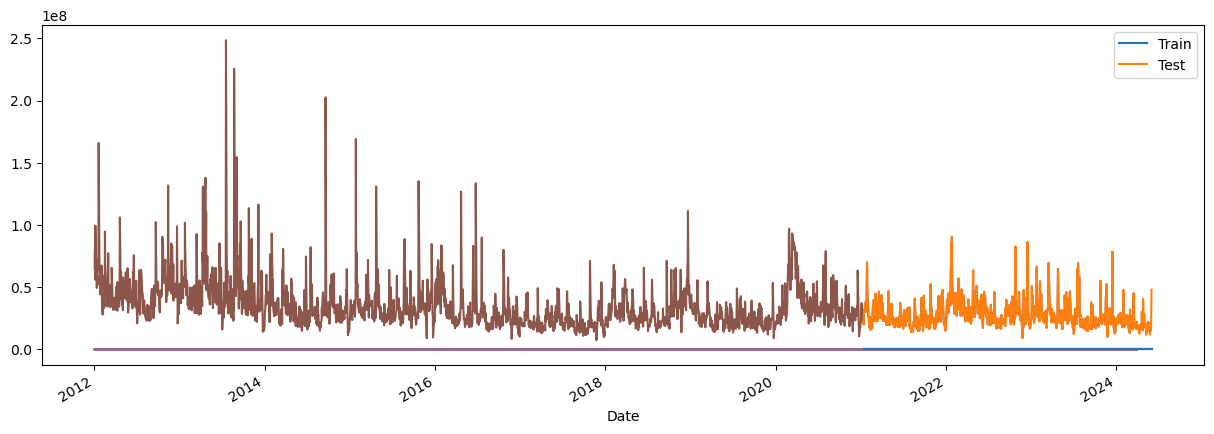

In [33]:
#train/test data plotting

train=df.loc[df.index<'2024-04-01']
test=df.loc[df.index>='2021-01-12']

fig,ax=plt.subplots(figsize=(15,5))
train.plot(ax=ax,label='Training Set')
test.plot(ax=ax,label='Test Set')

ax.legend(['Train','Test'])
plt.show()

In [34]:
# importing library..

from sklearn.ensemble import RandomForestRegressor

In [35]:
# create Random Forest Regressor object 

rf = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=2,
                           min_samples_leaf=1, max_features='sqrt', bootstrap=True)

In [36]:
# Fitting RF Regression to the Training set

rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt')

In [37]:
# Predicting the Test set results

y_pred = rf.predict(x_test)

In [38]:
#evaluate model's performance on train data

predict = rf.predict(x_train)
r2 = r2_score(y_train, predict)
mse = mean_squared_error(y_train, predict)
rmse = mean_squared_error(y_train, predict, squared=False)
mae = mean_absolute_error(y_train, predict)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9996205753520598
Mean Squared Error: 4.754469909482899
Root Mean Squared Error: 2.1804746981982843
Mean Absolute Error: 1.6459090624516843


In [39]:
#evaluate model's performance on test data

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9995425194963641
Mean Squared Error: 6.0630025608095215
Root Mean Squared Error: 2.4623165029722562
Mean Absolute Error: 1.8071511922244292


In [40]:
#predictions for data

test_ohl= test[ftrs]
y_pred = rf.predict(test_ohl)

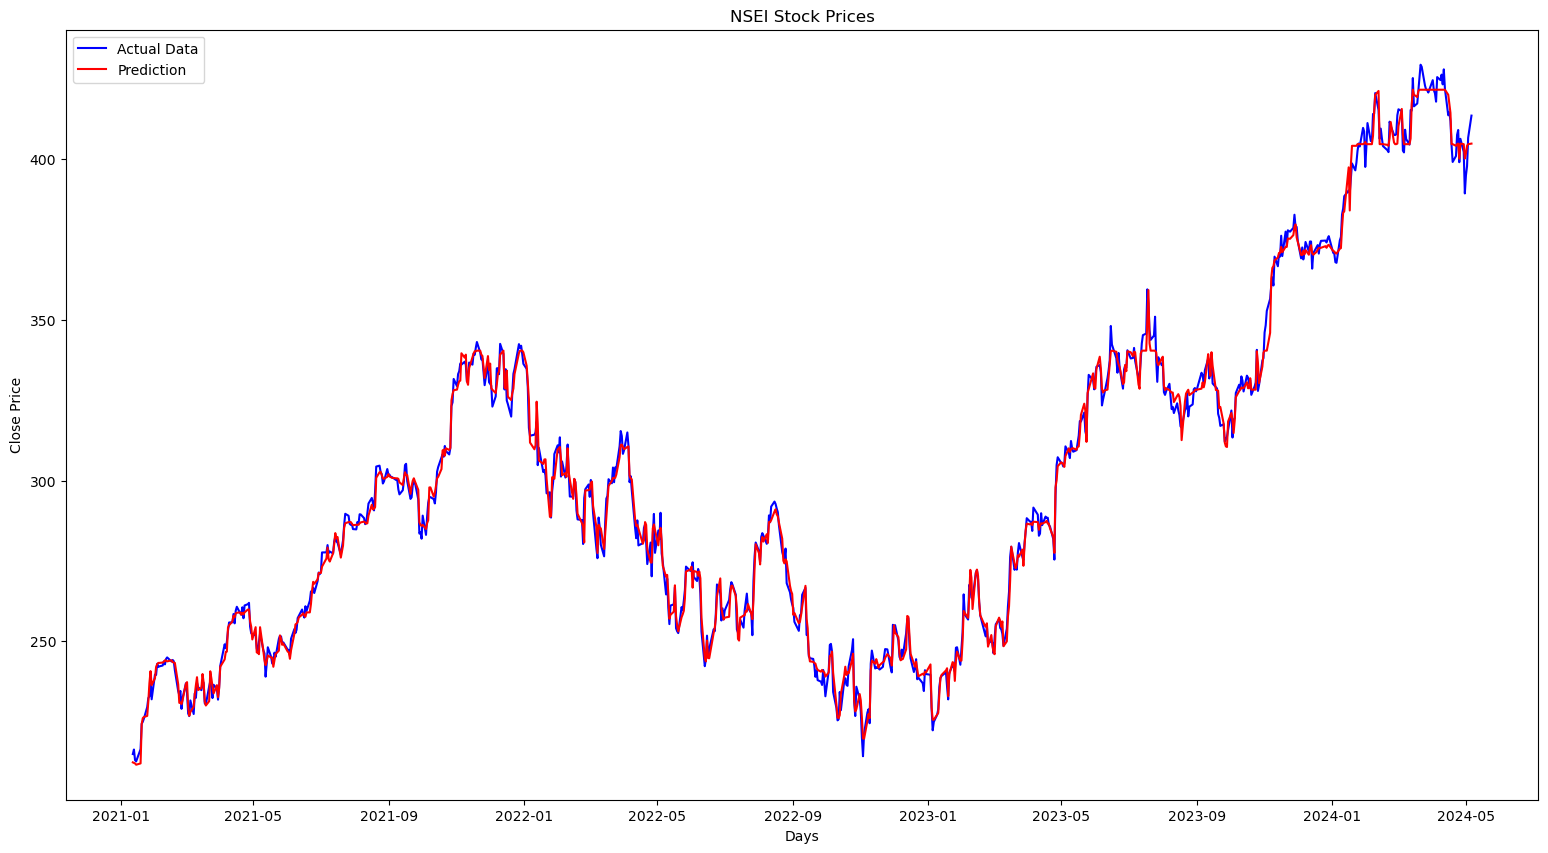

In [45]:
#plotting

plt.rcParams["figure.figsize"] = (19,10)

plt.plot(test.index,test[target], color = 'blue', label="Actual Data")
plt.plot(test.index,y_pred, color='red', label="Prediction")

plt.title('NSEI Stock Prices')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()